In [1]:
import torch
import matplotlib.pyplot as plt
from dataset import MnistDataModule
import default_config as config

# set random seed
torch.manual_seed(1)

In [2]:
# IMPORT 
dm = MnistDataModule(
        data_dir=config.DATA_DIR,
        batch_size=config.BATCH_SIZE,
        num_workers=config.NUM_WORKERS,
        permuted=config.PERMUTED,
        resize=config.RESIZE,
    )

torch.Size([256, 1, 14, 14]) torch.Size([256])


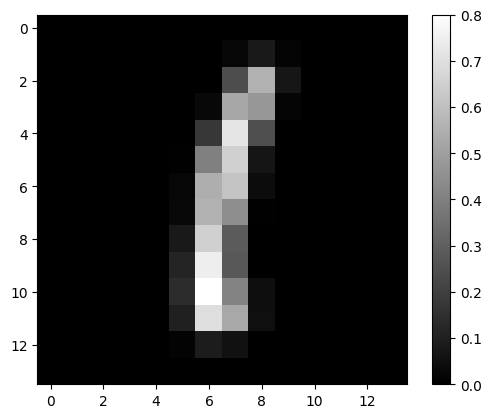

In [3]:
# visualize a given data
dm.setup()
data = next(iter(dm.train_dataloader()))
images, labels = data
print(images.shape, labels.shape)
plt.imshow(images[0].squeeze(), cmap='gray')
plt.colorbar()
plt.show()

In [4]:
img = images[0].squeeze()
print(img.shape)

torch.Size([14, 14])


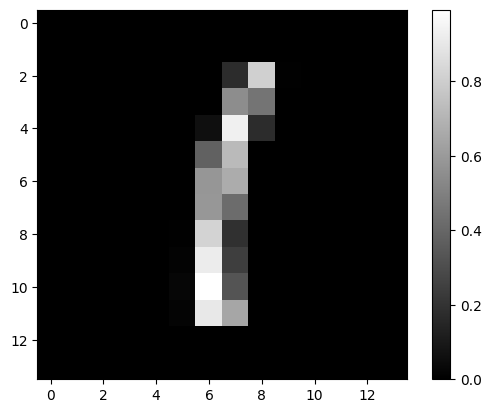

In [5]:
# apply the transform resize to this image and plot the new image and original image side by side using torch transform
resize = torch.nn.functional.interpolate(img.unsqueeze(0).unsqueeze(0), size=(14, 14), mode='bilinear')
plt.imshow(resize.squeeze(), cmap='gray')
plt.colorbar()
plt.show()


In [14]:
torch.allclose(resize.squeeze(), img, atol=1e-2) # check if the images are similar

RuntimeError: The size of tensor a (14) must match the size of tensor b (28) at non-singleton dimension 1

### We answer the question of how to parametrixe dt_tau

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
max_val = 0.01
x0 = torch.linspace(-1, 10, 100)
betas = [1, 2, 3, 4, 5]  # Change these values as needed

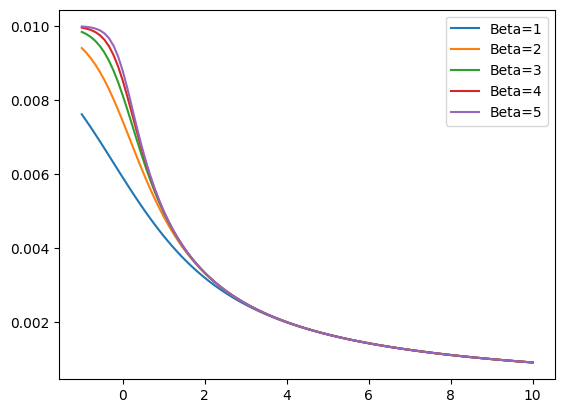

In [5]:
for beta in betas:
    x = max_val / (1 + F.softplus(x0, beta=beta))
    plt.plot(x0.numpy(), x.numpy(), label=f'Beta={beta}')

plt.legend()
plt.show()